<h2><b>Time Series Problem Statement: Sales Prediction</b></h2>
<b>Problem Overview</b>
Accurate sales forecasting is critical for effective supply chain management, as it directly impacts inventory levels, production planning, and resource allocation. <br>However, organizations often struggle with demand variability, seasonal trends, and market fluctuations, leading to inefficiencies such as overstocking, stockouts, or increased operational costs.<br><br>
This project aims to leverage data science techniques, particularly time series analysis, to predict sales patterns for the organization. <br>By analyzing historical sales data and identifying trends, seasonality, and anomalies, the model will provide accurate and actionable sales forecasts. <br>These insights will enable better demand planning, optimized inventory management, and improved decision-making across the supply chain, <br>ultimately enhancing operational efficiency and customer satisfaction.

In [40]:
# Importing the class from the Python file
import sys
import os

# Add the directory containing your .py file to the system path
sys.path.append(os.path.abspath('uniVariate.py'))
from uniVariate import NathanClaire_UnivariateTimeSeries as timeSeries

import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np 
import seaborn as sns
sns.set(style = 'darkgrid')

import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import plotly.express as px
import math

In [41]:
data = pd.read_csv('DataCoSupplyChainDataset.csv', encoding = 'latin1', engine = 'pyarrow')
data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,1005,1/16/2016 3:40,26043,1004,0.000000,0.00,65177,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,S

In [42]:
# Select the time and the response variable 
df = data[['order date (DateOrders)', 'Sales']]
df.rename(columns = {'order date (DateOrders)': 'Order_date'}, inplace=True)
df['Order_date'] = pd.to_datetime(df['Order_date'])
df.set_index('Order_date', inplace = True)
df = df.resample('D').sum()
df = df[df.index < '2017-10-01']
df

,Sales
Order_date,
2015-01-01,32806.090690
2015-01-02,29818.210575
2015-01-03,36348.710648
2015-01-04,35738.970669
2015-01-05,31067.910603
...,...
2017-09-26,41596.110592
2017-09-27,32756.710434
2017-09-28,39476.350411


In [44]:
ts = timeSeries(df, 'Sales')
ts.visual()

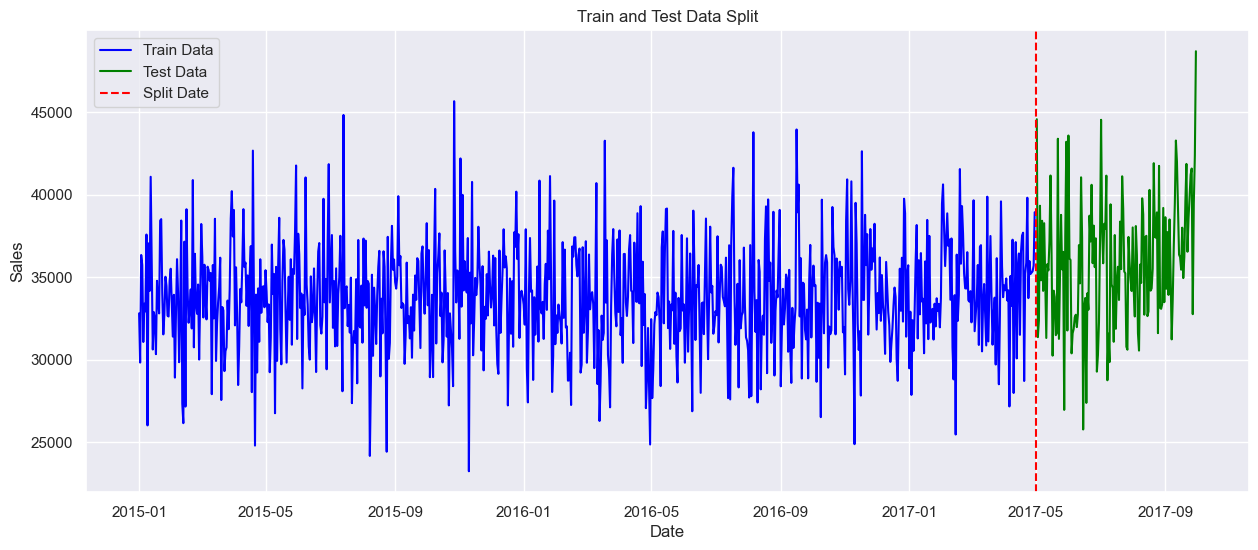

In [45]:
ts.generateModelData(show_split=True, split_date='2017-05-01')

16:25:04 - cmdstanpy - INFO - Chain [1] start processing
16:25:04 - cmdstanpy - INFO - Chain [1] done processing


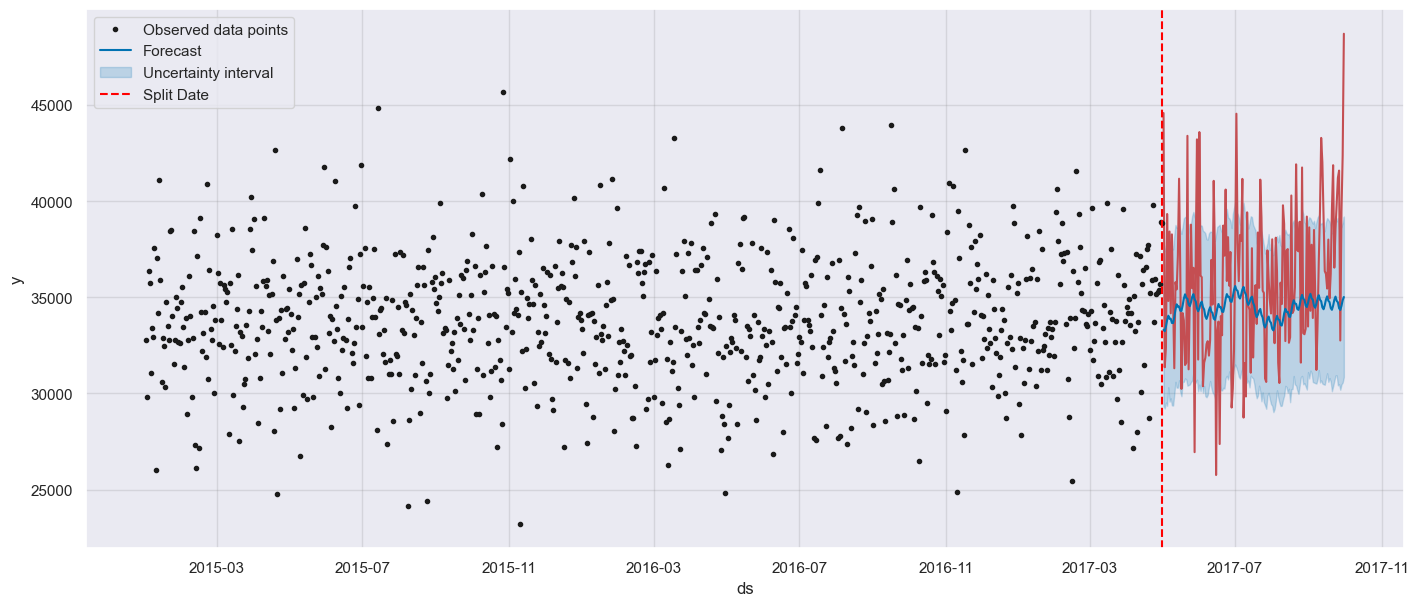

Coef Of Determination: -62.67282159518777
Correlation Coefficient: 0.10006895830442127



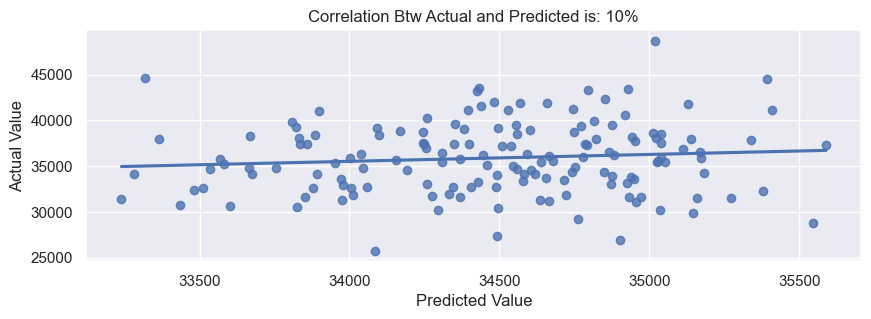

In [46]:
ts.modelling(plotPerformance=True, similarityScore=True, homoscedasticity=True)

21:02:53 - cmdstanpy - INFO - Chain [1] start processing
21:02:53 - cmdstanpy - INFO - Chain [1] done processing


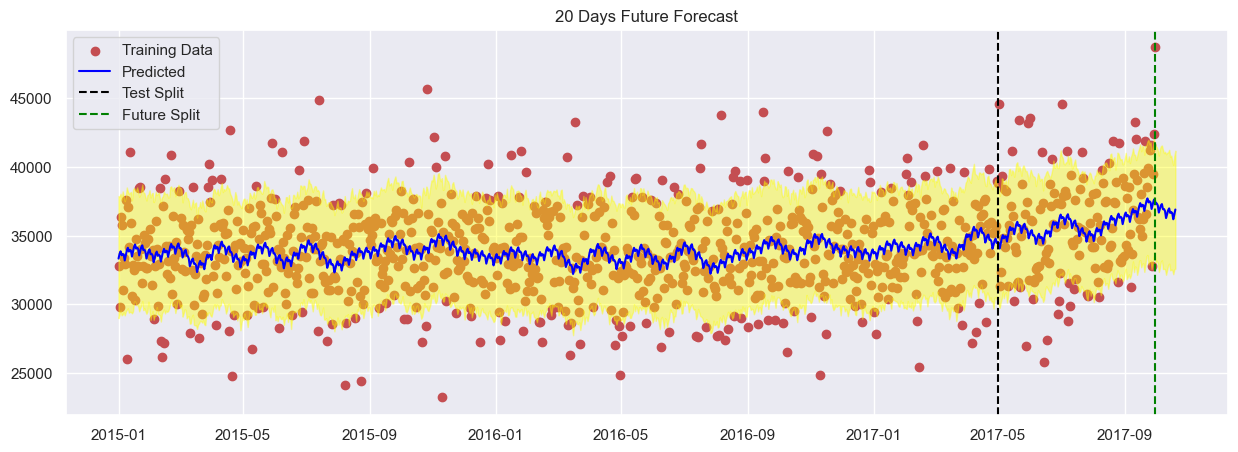

,ds,yhat
1004,2017-10-01,37320.08
1005,2017-10-02,37342.17
1006,2017-10-03,37201.52
1007,2017-10-04,36677.05
1008,2017-10-05,36924.37
1009,2017-10-06,37198.23
1010,2017-10-07,37296.68
1011,2017-10-08,36924.22
1012,2017-10-09,36935.12
1013,2017-10-10,36793.12


In [48]:
ts.futureForecast(timeDiff='1day', NumOfDays=20, getForecast=True,  plotForecast=True)